# Recht op Lucht - Inschatting concentratie januari

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import seaborn
seaborn.set_theme(style="whitegrid")
seaborn.set_context("poster")

In [2]:
data = pd.read_parquet("../data/external/vmm_antwerpen_2015-present.parquet")

In [3]:
data_monthly = data.resample("M").mean().tz_localize(None).to_period()

De verhouding van de concentratie in januari tov februari voor de verschillende VMM stations in 2021:

In [4]:
data_monthly.loc["2021-01"] / data_monthly.loc["2021-02"]

42R801    0.952067
42R802    0.987347
42R803    1.033619
42R804    1.191072
42R805    0.950385
42R806    0.942721
42R817    1.001999
dtype: float64

Met uitzondering van 42R804, wat het station aan de ring is, liggen de verhoudingen redelijk dicht bij elkaar.

In [5]:
df = pd.concat({
    "2021": data_monthly.loc["2021-01"] / data_monthly.loc["2021-02"],
    "2020": data_monthly.loc["2020-01"] / data_monthly.loc["2020-02"],
    "2019": data_monthly.loc["2019-01"] / data_monthly.loc["2019-02"],
    "2018": data_monthly.loc["2018-01"] / data_monthly.loc["2018-02"]
})
df.index.names = ["jaar", "station"]
df = df.reset_index(name="verhouding")

In [6]:
df.head()

,jaar,station,verhouding
0,2021,42R801,0.952067
1,2021,42R802,0.987347
2,2021,42R803,1.033619
3,2021,42R804,1.191072
4,2021,42R805,0.950385


<AxesSubplot:xlabel='jaar', ylabel='verhouding'>

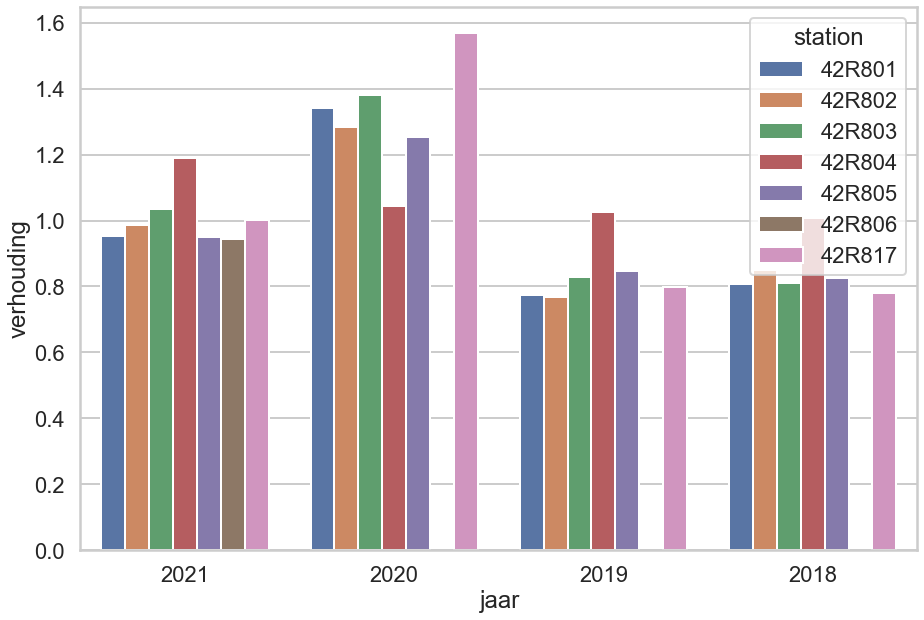

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))
seaborn.barplot(x="jaar", y="verhouding", hue="station", data=df, ax=ax)

Zonder het ring-station:

<AxesSubplot:xlabel='jaar', ylabel='verhouding'>

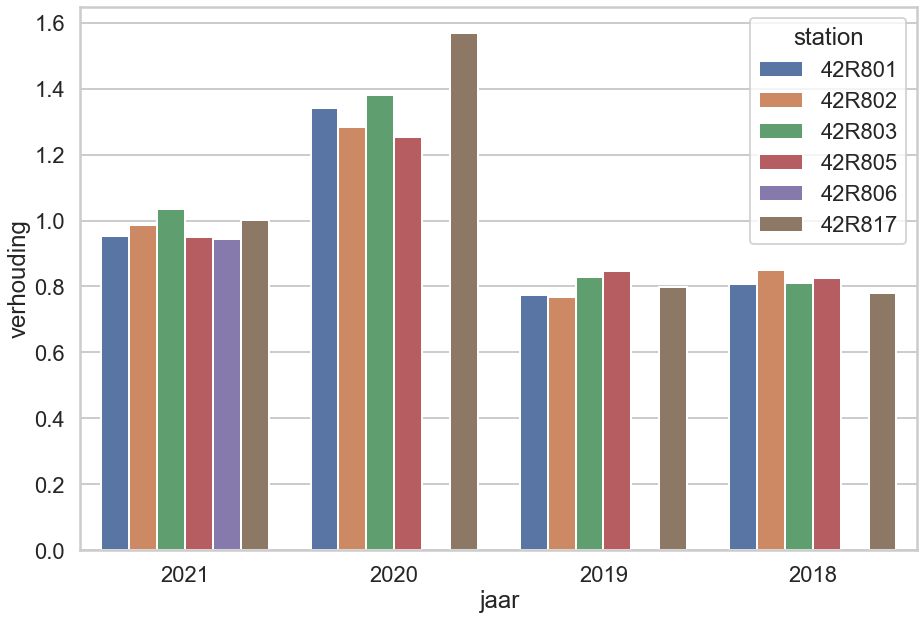

In [8]:
fig, ax = plt.subplots(figsize=(15, 10))
seaborn.barplot(x="jaar", y="verhouding", hue="station", data=df[df["station"] != "42R804"], ax=ax)

In [9]:
df[df["station"] != "42R804"].groupby("jaar").mean()

,verhouding
jaar,
2018,0.814663
2019,0.804017
2020,1.366259
2021,0.978023
